## Fruits and Veggies - Nodes

In [1]:

import torch
import torchhd

from src.encoding.configs_and_constants import VSAModel
from src.utils.utils import cartesian_bind_tensor, TupleIndexer
from collections import defaultdict

vsa = VSAModel.MAP
D = 112 * 112  # 96 didn't give 100%
fruits = torchhd.random(28, D, vsa=vsa.value)
veggies = torch.cat([torchhd.identity(1, D, vsa=vsa.value), torchhd.random(5, D, vsa=vsa.value)], dim=0)
node_codebook = cartesian_bind_tensor([fruits, veggies])
node_indexer = TupleIndexer([len(fruits), len(veggies)])

# Length 33
basket = [
    (0, 1),
    (0, 2),
    (0, 2),
    (0, 2),
    (0, 2),
    (0, 2),
    (0, 3),
    (2, 2),
    (2, 3),
    (0, 3),
    (2, 1),
    (0, 3),
    (0, 2),
    (0, 3),
    (0, 3),
    (0, 1),
    (2, 3),
    (0, 3),
    (0, 2),
    (0, 2),
    (0, 3),
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 1),
    (0, 3),
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 1),
    (2, 2),
    (0, 3),
    (5, 2),
]

print(basket)
print(len(basket))
unique_nodes = set(basket)
print(f"Unique Nodes -> {unique_nodes=}, {len(set(basket))=} ")
nodes_ground_truth = node_indexer.get_idxs(basket)
print(f"{sorted(set(nodes_ground_truth))=}")

nodes = [node_codebook[node_indexer.get_idx(t)] for t in basket]
embedding_0 = torchhd.multiset(torch.stack(nodes, dim=0))


d = torchhd.dot(embedding_0, node_codebook)
sim_node = torch.round(d).int().clamp(min=0) / D
## This should print 3, 0, 1, 0, 1, 0, 3, .... so many time as there items.
## And it does, so it should work
print(sim_node)
print(sim_node.sum().item())

[(0, 1), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 3), (2, 2), (2, 3), (0, 3), (2, 1), (0, 3), (0, 2), (0, 3), (0, 3), (0, 1), (2, 3), (0, 3), (0, 2), (0, 2), (0, 3), (0, 1), (0, 2), (0, 3), (0, 1), (0, 3), (0, 1), (0, 2), (0, 3), (1, 1), (2, 2), (0, 3), (5, 2)]
33
Unique Nodes -> unique_nodes={(0, 1), (2, 1), (1, 1), (0, 3), (2, 3), (0, 2), (2, 2), (5, 2)}, len(set(basket))=8 
sorted(set(nodes_ground_truth))=[1, 2, 3, 7, 13, 14, 15, 32]
MAPTensor([3.2685e-02, 4.6727e+00, 1.0029e+01, 1.1030e+01, 6.9037e-02,
           6.8878e-02, 1.1687e-01, 6.4621e-01, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 6.7538e-01, 1.9995e+00,
           1.9788e+00, 6.8240e-02, 6.8080e-02, 0.0000e+00, 2.1333e-01,
           4.2889e-02, 8.2111e-02, 2.6244e-01, 0.0000e+00, 7.8922e-02,
           5.2136e-02, 0.0000e+00, 0.0000e+00, 3.1728e-02, 7.7806e-02,
           2.7822e-01, 0.0000e+00, 9.0179e-01, 0.0000e+00, 0.0000e+00,
           8.2589e-02, 1.9133e-02, 4.7513e-02, 0.0000e+00, 

## Fruits and Veggies -- Edges

In [2]:
## Now level 1
## Length 72
edge_indexes = [
    (0, 1),
    (1, 0),
    (1, 2),
    (2, 1),
    (2, 3),
    (3, 2),
    (3, 4),
    (4, 3),
    (4, 5),
    (5, 4),
    (5, 6),
    (6, 5),
    (6, 7),
    (6, 32),
    (7, 6),
    (7, 8),
    (8, 7),
    (8, 9),
    (8, 31),
    (9, 8),
    (9, 10),
    (9, 11),
    (10, 9),
    (11, 9),
    (11, 12),
    (11, 28),
    (12, 11),
    (12, 13),
    (13, 12),
    (13, 14),
    (13, 27),
    (14, 13),
    (14, 15),
    (14, 16),
    (15, 14),
    (16, 14),
    (16, 17),
    (16, 25),
    (17, 16),
    (17, 18),
    (17, 23),
    (18, 17),
    (18, 19),
    (19, 18),
    (19, 20),
    (20, 19),
    (20, 21),
    (20, 22),
    (21, 20),
    (22, 20),
    (22, 23),
    (23, 17),
    (23, 22),
    (23, 24),
    (24, 23),
    (25, 16),
    (25, 26),
    (25, 27),
    (26, 25),
    (27, 13),
    (27, 25),
    (28, 11),
    (28, 29),
    (28, 30),
    (29, 28),
    (30, 28),
    (30, 31),
    (31, 8),
    (31, 30),
    (31, 32),
    (32, 6),
    (32, 31),
]

print(f"{len(edge_indexes)=}")

edge_dict = defaultdict(list)
for src_tp, dst_tp in edge_indexes:
    edge_dict[src_tp].append(dst_tp)
print(edge_dict)
print(len(edge_dict))

keys = []
values = []
for src, dsts in edge_dict.items():
    keys.append(node_codebook[node_indexer.get_idx(basket[src])])
    values.append(torchhd.multiset(torch.stack([node_codebook[node_indexer.get_idx(basket[d])] for d in dsts], dim=0)))

keys = torch.stack(keys, dim=0)
values = torch.stack(values, dim=0)
edge_terms_hash = torchhd.hash_table(keys, values)
edge_terms_hash_norm = edge_terms_hash.normalize()

## LEVEL 1
edge_term_bindings_lvl1 = [
    torchhd.bind(
        node_codebook[node_indexer.get_idx(basket[src])],
        torchhd.multiset(torch.stack([node_codebook[node_indexer.get_idx(basket[d])] for d in dsts], dim=0)),
    )
    for src, dsts in edge_dict.items()
]
print(f"{len(edge_term_bindings_lvl1)=}")


# [node_dim, D]
edge_terms_lvl1 = torchhd.multiset(torch.stack(edge_term_bindings_lvl1, dim=0))

# compute L2 norm along the last dimension (out‐of‐place)
hr_norm = edge_terms_lvl1.norm(dim=-1, keepdim=True)                     # [node_dim, 1]

# divide by norm, also out‐of‐place
edge_terms_lvl1_norm = edge_terms_lvl1 / (hr_norm + 1e-8)

embedding_1 = torchhd.multiset(torch.stack([embedding_0, edge_terms_hash_norm], dim=0))

## LEVEL2
edge_term_bindings_lvl2 = [
    torchhd.bind(
        edge_term_bindings_lvl1[src],
        torchhd.multiset(
            torch.stack([edge_term_bindings_lvl1[d] for d in dsts], dim=0)),
    )
    for src, dsts in edge_dict.items()
]
edge_terms_lvl2 = torchhd.multiset(torch.stack(edge_term_bindings_lvl2, dim=0))
edge_terms_lvl2_norm = edge_terms_lvl2.normalize()
embedding_2 = torchhd.multiset(torch.stack([embedding_1, edge_terms_lvl2_norm], dim=0))


## LEVEL3
edge_term_bindings_lvl3 = [
    torchhd.bind(
        edge_term_bindings_lvl2[src],
        torchhd.multiset(
            torch.stack([edge_term_bindings_lvl2[d] for d in dsts], dim=0)),
    )
    for src, dsts in edge_dict.items()
]
edge_terms_lvl3 = torchhd.multiset(torch.stack(edge_term_bindings_lvl3, dim=0))
edge_terms_lvl3_norm = edge_terms_lvl3.normalize()
embedding_3 = torchhd.multiset(torch.stack([embedding_2, edge_terms_lvl3_norm], dim=0))

## LEVEL4
edge_term_bindings_lvl4 = [
    torchhd.bind(
        edge_term_bindings_lvl3[src],
        torchhd.multiset(
            torch.stack([edge_term_bindings_lvl3[d] for d in dsts], dim=0)),
    )
    for src, dsts in edge_dict.items()
]
edge_terms_lvl4 = torchhd.multiset(torch.stack(edge_term_bindings_lvl4, dim=0))
edge_terms_lvl4_norm = edge_terms_lvl3.normalize()
embedding_4 = torchhd.multiset(torch.stack([embedding_3, edge_terms_lvl4_norm], dim=0))


len(edge_indexes)=72
defaultdict(<class 'list'>, {0: [1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 5], 5: [4, 6], 6: [5, 7, 32], 7: [6, 8], 8: [7, 9, 31], 9: [8, 10, 11], 10: [9], 11: [9, 12, 28], 12: [11, 13], 13: [12, 14, 27], 14: [13, 15, 16], 15: [14], 16: [14, 17, 25], 17: [16, 18, 23], 18: [17, 19], 19: [18, 20], 20: [19, 21, 22], 21: [20], 22: [20, 23], 23: [17, 22, 24], 24: [23], 25: [16, 26, 27], 26: [25], 27: [13, 25], 28: [11, 29, 30], 29: [28], 30: [28, 31], 31: [8, 30, 32], 32: [6, 31]})
33
len(edge_term_bindings_lvl1)=33


In [3]:
edge_codebook = cartesian_bind_tensor([node_codebook, node_codebook])

In [4]:
## Let's optimize the edge decoder
from src.utils.utils import TupleIndexer


decoded_node_idx = sim_node.nonzero(as_tuple=True)[0].tolist()
print(f"{decoded_node_idx=}")
print(f"{len(decoded_node_idx)=}")

upper = [
    (decoded_node_idx[i], decoded_node_idx[j])
    for i in range(len(decoded_node_idx))
    for j in range(i, len(decoded_node_idx))
]
print(f"{upper=}")

lower = [(v, u) for u, v in upper]
print(f"{lower=}")

edge_indexer = TupleIndexer([node_codebook.shape[0], node_codebook.shape[0]])
print(f"{edge_indexer.get_sizes()=}")

upper_idxs = edge_indexer.get_idxs(upper)
print(f"{upper_idxs=}")
print(f"{len(upper_idxs)=}")

lower_idxs = edge_indexer.get_idxs(lower)
print(f"{lower_idxs=}")
print(f"{len(lower_idxs)=}")

upper_codebook = edge_codebook[upper_idxs]
print(f"{upper_codebook.shape=}")

lower_codebook = edge_codebook[lower_idxs]
print(f"{lower_codebook.shape=}")

decoded_node_idx=[0, 1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 28, 29, 30, 32, 35, 36, 37, 42, 43, 44, 45, 46, 52, 55, 56, 57, 62, 63, 64, 65, 66, 70, 71, 73, 75, 77, 78, 80, 81, 82, 85, 86, 87, 89, 91, 97, 100, 102, 108, 110, 111, 119, 122, 123, 126, 127, 128, 129, 130, 133, 136, 139, 141, 143, 145, 153, 154, 155, 156, 157, 158, 159, 162, 167]
len(decoded_node_idx)=83
upper=[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 19), (0, 20), (0, 21), (0, 22), (0, 24), (0, 25), (0, 28), (0, 29), (0, 30), (0, 32), (0, 35), (0, 36), (0, 37), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 52), (0, 55), (0, 56), (0, 57), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 70), (0, 71), (0, 73), (0, 75), (0, 77), (0, 78), (0, 80), (0, 81), (0, 82), (0, 85), (0, 86), (0, 87), (0, 89), (0, 91), (0, 97), (0, 100), (0, 102), (0, 108), (0, 110), (0, 111), (0, 119), (0, 122), (0, 123), (0, 126), (0, 127), (0, 128), (

In [5]:
from collections import Counter

sim_upper = torchhd.dot(embedding_1, upper_codebook)
sim_lower = torchhd.dot(embedding_1, lower_codebook)
sim_enhanced = (sim_upper + sim_lower)
print(f"{sim_enhanced=}")
print(f"{sim_enhanced.shape=}")
print(f"{sim_enhanced.nonzero().shape=}")

decoded_edges = []
for i in range(sim_enhanced.shape[0]):
    if sim_enhanced[i].item() > 0:  # Edge exists
        decoded_edges.append(upper[i])
        decoded_edges.append(lower[i])
print(f"{decoded_edges=}")
print(f"{len(decoded_edges)=}")

real_edges = [(node_indexer.get_idx(basket[u]), node_indexer.get_idx(basket[v])) for u, v in edge_indexes]
print(f"{real_edges=}")
print(f"{len(real_edges)=}")
print(f"{Counter(real_edges)=}")
print(f"{len(set(real_edges))=}")
print(f"{set(real_edges)=}")

sim_enhanced=MAPTensor([ 9620.,  1068., -1484.,  ...,  9620.,  4516.,  9620.])
sim_enhanced.shape=torch.Size([3486])
sim_enhanced.nonzero().shape=torch.Size([3486, 1])
decoded_edges=[(0, 0), (0, 0), (0, 1), (1, 0), (0, 5), (5, 0), (0, 13), (13, 0), (0, 14), (14, 0), (0, 15), (15, 0), (0, 22), (22, 0), (0, 29), (29, 0), (0, 36), (36, 0), (0, 42), (42, 0), (0, 43), (43, 0), (0, 44), (44, 0), (0, 45), (45, 0), (0, 52), (52, 0), (0, 62), (62, 0), (0, 63), (63, 0), (0, 64), (64, 0), (0, 65), (65, 0), (0, 66), (66, 0), (0, 70), (70, 0), (0, 71), (71, 0), (0, 73), (73, 0), (0, 75), (75, 0), (0, 78), (78, 0), (0, 80), (80, 0), (0, 81), (81, 0), (0, 82), (82, 0), (0, 85), (85, 0), (0, 86), (86, 0), (0, 87), (87, 0), (0, 89), (89, 0), (0, 123), (123, 0), (0, 127), (127, 0), (0, 128), (128, 0), (0, 129), (129, 0), (0, 130), (130, 0), (0, 133), (133, 0), (0, 136), (136, 0), (0, 139), (139, 0), (0, 141), (141, 0), (0, 143), (143, 0), (0, 153), (153, 0), (0, 154), (154, 0), (0, 155), (155, 0), (0, 1

In [6]:
# Unique Nodes -> unique_nodes={(0, 1), (2, 1), (1, 1), (0, 3), (2, 3), (0, 2), (2, 2), (5, 2)}, len(set(basket))=8
decode_node_tuples = node_indexer.get_tuples(decoded_node_idx)

In [7]:
import itertools

all_possible_edges = list(itertools.product(decode_node_tuples, decode_node_tuples))
print(f"{all_possible_edges=}")
print(f"{len(all_possible_edges)=}")

## Real edges
### real_edges=[(1, 2), (2, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 3), (3, 2), (3, 14), (3, 32), (14, 3), (14, 15), (15, 14), (15, 3), (15, 3), (3, 15), (3, 13), (3, 3), (13, 3), (3, 3), (3, 2), (3, 3), (2, 3), (2, 3), (3, 2), (3, 3), (3, 2), (3, 3), (3, 1), (3, 15), (1, 3), (15, 3), (15, 3), (15, 3), (3, 15), (3, 2), (3, 3), (2, 3), (2, 2), (2, 2), (2, 3), (3, 2), (3, 1), (3, 2), (1, 3), (2, 3), (2, 3), (3, 3), (3, 2), (3, 1), (1, 3), (3, 15), (3, 1), (3, 2), (1, 3), (2, 3), (2, 3), (3, 3), (3, 7), (3, 14), (7, 3), (14, 3), (14, 3), (3, 15), (3, 14), (3, 32), (32, 3), (32, 3)]
all_possible_edges_node_idx = [(node_indexer.get_idx(u), node_indexer.get_idx(v)) for  u, v in all_possible_edges]
print(f"{all_possible_edges_node_idx=}")
print(f"{len(all_possible_edges_node_idx)=}")

all_possible_edges=[((0, 0), (0, 0)), ((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (0, 3)), ((0, 0), (0, 4)), ((0, 0), (0, 5)), ((0, 0), (1, 0)), ((0, 0), (1, 1)), ((0, 0), (2, 1)), ((0, 0), (2, 2)), ((0, 0), (2, 3)), ((0, 0), (2, 4)), ((0, 0), (2, 5)), ((0, 0), (3, 1)), ((0, 0), (3, 2)), ((0, 0), (3, 3)), ((0, 0), (3, 4)), ((0, 0), (4, 0)), ((0, 0), (4, 1)), ((0, 0), (4, 4)), ((0, 0), (4, 5)), ((0, 0), (5, 0)), ((0, 0), (5, 2)), ((0, 0), (5, 5)), ((0, 0), (6, 0)), ((0, 0), (6, 1)), ((0, 0), (7, 0)), ((0, 0), (7, 1)), ((0, 0), (7, 2)), ((0, 0), (7, 3)), ((0, 0), (7, 4)), ((0, 0), (8, 4)), ((0, 0), (9, 1)), ((0, 0), (9, 2)), ((0, 0), (9, 3)), ((0, 0), (10, 2)), ((0, 0), (10, 3)), ((0, 0), (10, 4)), ((0, 0), (10, 5)), ((0, 0), (11, 0)), ((0, 0), (11, 4)), ((0, 0), (11, 5)), ((0, 0), (12, 1)), ((0, 0), (12, 3)), ((0, 0), (12, 5)), ((0, 0), (13, 0)), ((0, 0), (13, 2)), ((0, 0), (13, 3)), ((0, 0), (13, 4)), ((0, 0), (14, 1)), ((0, 0), (14, 2)), ((0, 0), (14, 3)), ((0, 0), (14, 5)), ((0, 0),

In [8]:
real_deges = sorted(set(real_edges))
print(real_deges)

[(1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (3, 7), (3, 13), (3, 14), (3, 15), (3, 32), (7, 3), (13, 3), (14, 3), (14, 15), (15, 3), (15, 14), (32, 3)]


## Decoding edge_terms Level 1

[(0, 0), (0, 1), (0, 5), (0, 13), (0, 14), (0, 15), (0, 22), (0, 29), (0, 36), (0, 42), (0, 43), (0, 44), (0, 45), (0, 52), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 70), (0, 71), (0, 73), (0, 75), (0, 78), (0, 80), (0, 81), (0, 82), (0, 85), (0, 86), (0, 87), (0, 89), (0, 123), (0, 127), (0, 128), (0, 129), (0, 130), (0, 133), (0, 136), (0, 139), (0, 141), (0, 143), (0, 153), (0, 154), (0, 155), (0, 157), (0, 162), (1, 0), (1, 1), (1, 3), (1, 4), (1, 13), (1, 15), (1, 16), (1, 17), (1, 35), (1, 37), (1, 42), (1, 43), (1, 45), (1, 46), (1, 52), (1, 55), (1, 66), (1, 70), (1, 75), (1, 77), (1, 78), (1, 82), (1, 85), (1, 86), (1, 87), (1, 89), (1, 100), (1, 102), (1, 108), (1, 122), (1, 123), (1, 126), (1, 133), (1, 136), (1, 143), (1, 145), (1, 154), (1, 155), (1, 156), (1, 158), (1, 167), (2, 2), (2, 3), (2, 4), (2, 14), (2, 15), (2, 16), (2, 17), (2, 24), (2, 29), (2, 42), (2, 44), (2, 56), (2, 57), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 70), (2, 71), (2, 73), (2, 78)

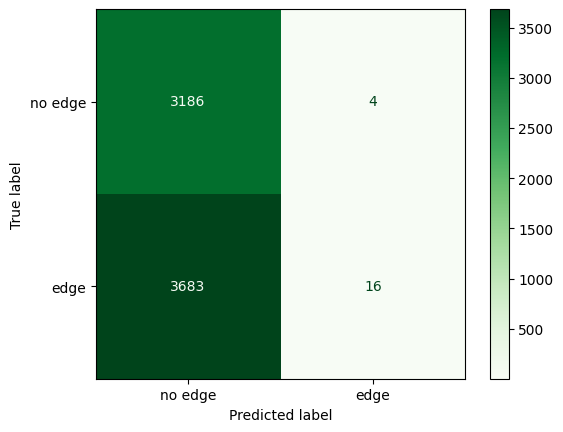

In [9]:
print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges = []

for src_tp, dst_tp in all_possible_edges_node_idx:
    node_hv_bind = node_codebook[src_tp].bind(node_codebook[dst_tp])
    sim_b = torchhd.dot(edge_terms_hash_norm, node_hv_bind) / D
    edge = (src_tp, dst_tp)
    count_as_edge = sim_b > 0
    if count_as_edge:
        pred_edges.append(edge)
    truth = edge in real_edges
    y_true.append(int(count_as_edge))
    y_pred.append(int(truth))
    equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)

    print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges)}")
print(f"{sorted(pred_edges)=}")

print(f"{len(decoded_edges)=}")
print(f"{sorted(decoded_edges)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


## Decoding Embedding 1

[(0, 0), (0, 1), (0, 5), (0, 13), (0, 14), (0, 15), (0, 22), (0, 29), (0, 36), (0, 42), (0, 43), (0, 44), (0, 45), (0, 52), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 70), (0, 71), (0, 73), (0, 75), (0, 78), (0, 80), (0, 81), (0, 82), (0, 85), (0, 86), (0, 87), (0, 89), (0, 123), (0, 127), (0, 128), (0, 129), (0, 130), (0, 133), (0, 136), (0, 139), (0, 141), (0, 143), (0, 153), (0, 154), (0, 155), (0, 157), (0, 162), (1, 0), (1, 1), (1, 3), (1, 4), (1, 13), (1, 15), (1, 16), (1, 17), (1, 35), (1, 37), (1, 42), (1, 43), (1, 45), (1, 46), (1, 52), (1, 55), (1, 66), (1, 70), (1, 75), (1, 77), (1, 78), (1, 82), (1, 85), (1, 86), (1, 87), (1, 89), (1, 100), (1, 102), (1, 108), (1, 122), (1, 123), (1, 126), (1, 133), (1, 136), (1, 143), (1, 145), (1, 154), (1, 155), (1, 156), (1, 158), (1, 167), (2, 2), (2, 3), (2, 4), (2, 14), (2, 15), (2, 16), (2, 17), (2, 24), (2, 29), (2, 42), (2, 44), (2, 56), (2, 57), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 70), (2, 71), (2, 73), (2, 78)

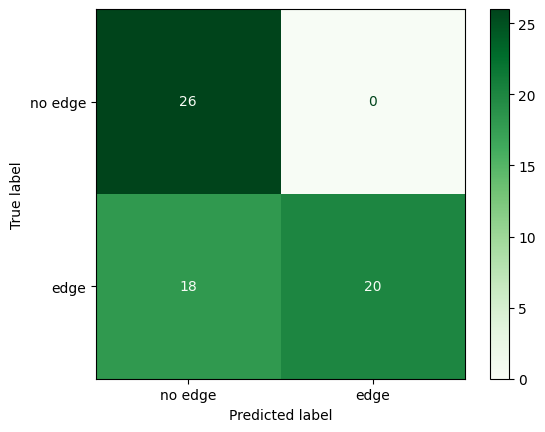

In [10]:
print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = node_codebook[src_idx].inverse().bind(edge_terms_lvl1_norm)
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv)
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


## Decoding Embedding 2

[(0, 0), (0, 1), (0, 5), (0, 13), (0, 14), (0, 15), (0, 22), (0, 29), (0, 36), (0, 42), (0, 43), (0, 44), (0, 45), (0, 52), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 70), (0, 71), (0, 73), (0, 75), (0, 78), (0, 80), (0, 81), (0, 82), (0, 85), (0, 86), (0, 87), (0, 89), (0, 123), (0, 127), (0, 128), (0, 129), (0, 130), (0, 133), (0, 136), (0, 139), (0, 141), (0, 143), (0, 153), (0, 154), (0, 155), (0, 157), (0, 162), (1, 0), (1, 1), (1, 3), (1, 4), (1, 13), (1, 15), (1, 16), (1, 17), (1, 35), (1, 37), (1, 42), (1, 43), (1, 45), (1, 46), (1, 52), (1, 55), (1, 66), (1, 70), (1, 75), (1, 77), (1, 78), (1, 82), (1, 85), (1, 86), (1, 87), (1, 89), (1, 100), (1, 102), (1, 108), (1, 122), (1, 123), (1, 126), (1, 133), (1, 136), (1, 143), (1, 145), (1, 154), (1, 155), (1, 156), (1, 158), (1, 167), (2, 2), (2, 3), (2, 4), (2, 14), (2, 15), (2, 16), (2, 17), (2, 24), (2, 29), (2, 42), (2, 44), (2, 56), (2, 57), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 70), (2, 71), (2, 73), (2, 78)

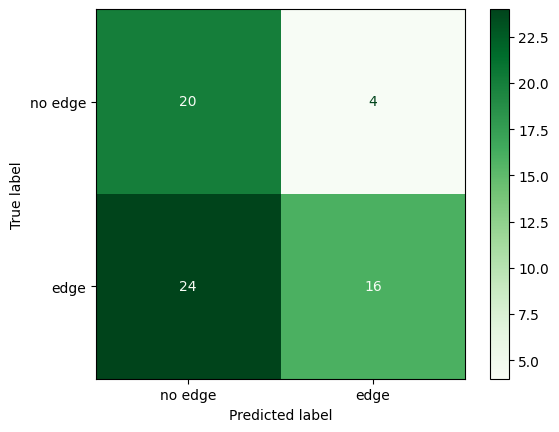

In [11]:
print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_3 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = node_codebook[src_idx].inverse().bind(embedding_2)
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv)
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_3.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_3)}")
print(f"{sorted(pred_edges_3)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


## Decoding Embedding 3

[(0, 0), (0, 1), (0, 5), (0, 13), (0, 14), (0, 15), (0, 22), (0, 29), (0, 36), (0, 42), (0, 43), (0, 44), (0, 45), (0, 52), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 70), (0, 71), (0, 73), (0, 75), (0, 78), (0, 80), (0, 81), (0, 82), (0, 85), (0, 86), (0, 87), (0, 89), (0, 123), (0, 127), (0, 128), (0, 129), (0, 130), (0, 133), (0, 136), (0, 139), (0, 141), (0, 143), (0, 153), (0, 154), (0, 155), (0, 157), (0, 162), (1, 0), (1, 1), (1, 3), (1, 4), (1, 13), (1, 15), (1, 16), (1, 17), (1, 35), (1, 37), (1, 42), (1, 43), (1, 45), (1, 46), (1, 52), (1, 55), (1, 66), (1, 70), (1, 75), (1, 77), (1, 78), (1, 82), (1, 85), (1, 86), (1, 87), (1, 89), (1, 100), (1, 102), (1, 108), (1, 122), (1, 123), (1, 126), (1, 133), (1, 136), (1, 143), (1, 145), (1, 154), (1, 155), (1, 156), (1, 158), (1, 167), (2, 2), (2, 3), (2, 4), (2, 14), (2, 15), (2, 16), (2, 17), (2, 24), (2, 29), (2, 42), (2, 44), (2, 56), (2, 57), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 70), (2, 71), (2, 73), (2, 78)

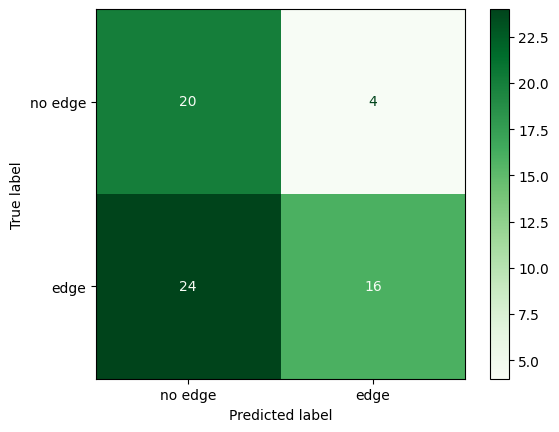

In [12]:
print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_4 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = node_codebook[src_idx].inverse().bind(embedding_3)
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv)
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_4.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_4)}")
print(f"{sorted(pred_edges_4)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


## Hashmap with Variables for Each Level

In [13]:
levels_vars = torchhd.random(5, D, vsa=vsa.value)

## Keep each level's hv in a variable in a hashmap
keys = levels_vars[0:4]

values = torch.stack([
    embedding_0, # Multiset of nodes
    edge_terms_lvl1_norm,
    edge_terms_lvl2_norm,
    edge_terms_lvl3_norm
], dim=0)

hashmap_levels_hg = torchhd.structures.HashTable.from_tensors(keys, values)
print(hashmap_levels_hg.value)


MAPTensor([  6.9965, -20.9872,  20.9860,  ..., -32.9791,  -3.0000,   7.0012])


### Decoding Nodes

In [14]:
level0_var = levels_vars[0]
d_hash = torchhd.dot(hashmap_levels_hg.get(level0_var), node_codebook)
d_hash = d_hash / D
sim_node_hash = torch.round(d_hash).int().clamp(min=0)
print(sim_node_hash)
print(sim_node_hash.sum().item())
decoded_node_idx_hash = sim_node_hash.nonzero(as_tuple=True)[0].tolist()
print(f"{decoded_node_idx_hash=}")
print(f"{len(decoded_node_idx_hash)=}")

MAPTensor([ 0,  5, 10, 11,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  2,  2,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
          dtype=torch.int32)
33
decoded_node_idx_hash=[1, 2, 3, 7, 13, 14, 15, 32]
len(decoded_node_idx_hash)=8


### Decoding edges level1

[(0, 0), (0, 1), (0, 5), (0, 13), (0, 14), (0, 15), (0, 22), (0, 29), (0, 36), (0, 42), (0, 43), (0, 44), (0, 45), (0, 52), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 70), (0, 71), (0, 73), (0, 75), (0, 78), (0, 80), (0, 81), (0, 82), (0, 85), (0, 86), (0, 87), (0, 89), (0, 123), (0, 127), (0, 128), (0, 129), (0, 130), (0, 133), (0, 136), (0, 139), (0, 141), (0, 143), (0, 153), (0, 154), (0, 155), (0, 157), (0, 162), (1, 0), (1, 1), (1, 3), (1, 4), (1, 13), (1, 15), (1, 16), (1, 17), (1, 35), (1, 37), (1, 42), (1, 43), (1, 45), (1, 46), (1, 52), (1, 55), (1, 66), (1, 70), (1, 75), (1, 77), (1, 78), (1, 82), (1, 85), (1, 86), (1, 87), (1, 89), (1, 100), (1, 102), (1, 108), (1, 122), (1, 123), (1, 126), (1, 133), (1, 136), (1, 143), (1, 145), (1, 154), (1, 155), (1, 156), (1, 158), (1, 167), (2, 2), (2, 3), (2, 4), (2, 14), (2, 15), (2, 16), (2, 17), (2, 24), (2, 29), (2, 42), (2, 44), (2, 56), (2, 57), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 70), (2, 71), (2, 73), (2, 78)

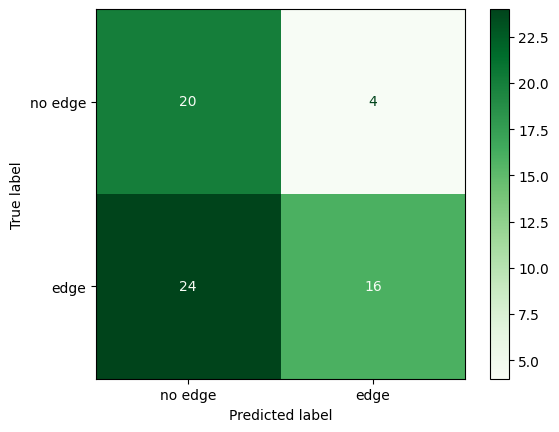

In [15]:
from src.utils import utils

level1_var = levels_vars[1]
lvl1_value_retrieved = hashmap_levels_hg.get(level1_var)

print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = utils.unbind(composite=lvl1_value_retrieved, factor=node_codebook[src_idx])
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv) / D
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b > 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


### Decoding Edges Level 2

[(0, 0), (0, 1), (0, 5), (0, 13), (0, 14), (0, 15), (0, 22), (0, 29), (0, 36), (0, 42), (0, 43), (0, 44), (0, 45), (0, 52), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 70), (0, 71), (0, 73), (0, 75), (0, 78), (0, 80), (0, 81), (0, 82), (0, 85), (0, 86), (0, 87), (0, 89), (0, 123), (0, 127), (0, 128), (0, 129), (0, 130), (0, 133), (0, 136), (0, 139), (0, 141), (0, 143), (0, 153), (0, 154), (0, 155), (0, 157), (0, 162), (1, 0), (1, 1), (1, 3), (1, 4), (1, 13), (1, 15), (1, 16), (1, 17), (1, 35), (1, 37), (1, 42), (1, 43), (1, 45), (1, 46), (1, 52), (1, 55), (1, 66), (1, 70), (1, 75), (1, 77), (1, 78), (1, 82), (1, 85), (1, 86), (1, 87), (1, 89), (1, 100), (1, 102), (1, 108), (1, 122), (1, 123), (1, 126), (1, 133), (1, 136), (1, 143), (1, 145), (1, 154), (1, 155), (1, 156), (1, 158), (1, 167), (2, 2), (2, 3), (2, 4), (2, 14), (2, 15), (2, 16), (2, 17), (2, 24), (2, 29), (2, 42), (2, 44), (2, 56), (2, 57), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 70), (2, 71), (2, 73), (2, 78)

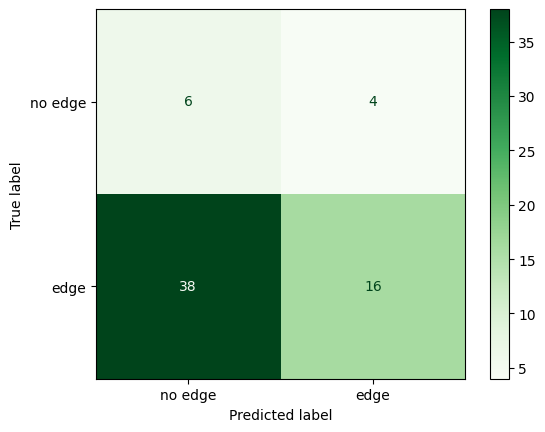

In [19]:
from src.utils import utils

level2_var = levels_vars[2]
lvl2_value_retrieved = hashmap_levels_hg.get(level2_var)

print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = utils.unbind(composite=lvl2_value_retrieved, factor=node_codebook[src_idx])
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv) / D
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


### Decoding Edges Level 3

[(0, 0), (0, 1), (0, 5), (0, 13), (0, 14), (0, 15), (0, 22), (0, 29), (0, 36), (0, 42), (0, 43), (0, 44), (0, 45), (0, 52), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 70), (0, 71), (0, 73), (0, 75), (0, 78), (0, 80), (0, 81), (0, 82), (0, 85), (0, 86), (0, 87), (0, 89), (0, 123), (0, 127), (0, 128), (0, 129), (0, 130), (0, 133), (0, 136), (0, 139), (0, 141), (0, 143), (0, 153), (0, 154), (0, 155), (0, 157), (0, 162), (1, 0), (1, 1), (1, 3), (1, 4), (1, 13), (1, 15), (1, 16), (1, 17), (1, 35), (1, 37), (1, 42), (1, 43), (1, 45), (1, 46), (1, 52), (1, 55), (1, 66), (1, 70), (1, 75), (1, 77), (1, 78), (1, 82), (1, 85), (1, 86), (1, 87), (1, 89), (1, 100), (1, 102), (1, 108), (1, 122), (1, 123), (1, 126), (1, 133), (1, 136), (1, 143), (1, 145), (1, 154), (1, 155), (1, 156), (1, 158), (1, 167), (2, 2), (2, 3), (2, 4), (2, 14), (2, 15), (2, 16), (2, 17), (2, 24), (2, 29), (2, 42), (2, 44), (2, 56), (2, 57), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 70), (2, 71), (2, 73), (2, 78)

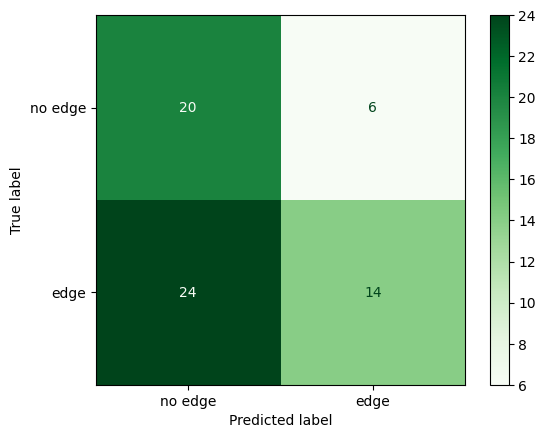

In [23]:
from src.utils import utils

level3_var = levels_vars[3]
lvl3_value_retrieved = hashmap_levels_hg.get(level3_var)

print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = utils.unbind(composite=lvl3_value_retrieved, factor=node_codebook[src_idx])
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv) / D
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


### Decoding Edges Level 4

[(0, 0), (0, 1), (0, 5), (0, 13), (0, 14), (0, 15), (0, 22), (0, 29), (0, 36), (0, 42), (0, 43), (0, 44), (0, 45), (0, 52), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 70), (0, 71), (0, 73), (0, 75), (0, 78), (0, 80), (0, 81), (0, 82), (0, 85), (0, 86), (0, 87), (0, 89), (0, 123), (0, 127), (0, 128), (0, 129), (0, 130), (0, 133), (0, 136), (0, 139), (0, 141), (0, 143), (0, 153), (0, 154), (0, 155), (0, 157), (0, 162), (1, 0), (1, 1), (1, 3), (1, 4), (1, 13), (1, 15), (1, 16), (1, 17), (1, 35), (1, 37), (1, 42), (1, 43), (1, 45), (1, 46), (1, 52), (1, 55), (1, 66), (1, 70), (1, 75), (1, 77), (1, 78), (1, 82), (1, 85), (1, 86), (1, 87), (1, 89), (1, 100), (1, 102), (1, 108), (1, 122), (1, 123), (1, 126), (1, 133), (1, 136), (1, 143), (1, 145), (1, 154), (1, 155), (1, 156), (1, 158), (1, 167), (2, 2), (2, 3), (2, 4), (2, 14), (2, 15), (2, 16), (2, 17), (2, 24), (2, 29), (2, 42), (2, 44), (2, 56), (2, 57), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 70), (2, 71), (2, 73), (2, 78)

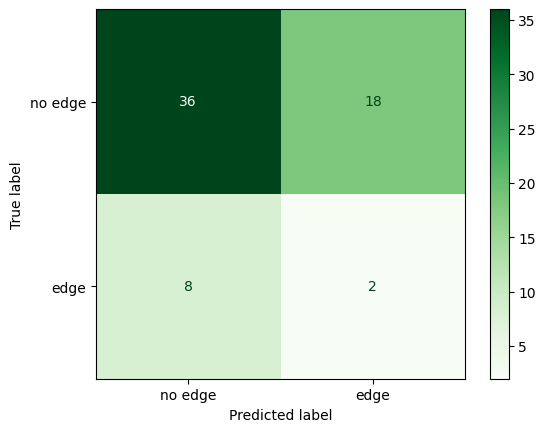

In [22]:
from src.utils import utils

level4_var = levels_vars[4]
lvl4_value_retrieved = hashmap_levels_hg.get(level4_var)

print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = utils.unbind(composite=lvl4_value_retrieved, factor=node_codebook[src_idx])
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv) / D
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b > 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()
